#📌 Extracão

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
url = 'https://github.com/alura-cursos/challenge2-data-science/raw/refs/heads/main/TelecomX_Data.json'
df_telecom = pd.read_json(url)
df_telecom

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [3]:
df_customer = pd.json_normalize(df_telecom['customer'])
df_phone = pd.json_normalize(df_telecom['phone'])
df_internet = pd.json_normalize(df_telecom['internet'])
df_account = pd.json_normalize(df_telecom['account'])

In [4]:
df_normalizados = df_telecom[['customerID','Churn']].copy()
df_uniao = [df_normalizados, df_customer, df_phone, df_internet, df_account]
df_final = pd.concat(df_uniao, axis=1)

In [5]:
df_final.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [6]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


#🔧 Transformação

In [7]:
df_final = df_final.drop(columns=['customerID'])

In [8]:
df_final.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [9]:
df_final['Charges.Total'] = df_final['Charges.Total'].apply(lambda x: x.replace(',','.').strip())

In [10]:
df_final['Charges.Total'] = pd.to_numeric(df_final['Charges.Total'], errors='coerce')

In [11]:
valores_permitidos_churn = ['Yes', 'No']
df_final = df_final[df_final['Churn'].isin(valores_permitidos_churn)].copy()

In [12]:
# Criando uma coluna com valores numericos para Churn ( cancelamento). Facilita calculos futuros! No = 0 Yes = 1
df_final['Churn_numeric'] = df_final['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
#df_final.insert(1, 'Churn_numeric', Churn_numeric)

In [13]:
taxa_churn_geral = df_final['Churn_numeric'].mean()
print(f"Taxa de Churn Geral: {taxa_churn_geral:.2%}")

Taxa de Churn Geral: 26.54%


In [14]:
clientes_cancelamento = df_final[df_final['Churn'] == 'Yes'].copy().reset_index(drop=True)
clientes_cancelamento.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Churn_numeric
0,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,1
1,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,1
2,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,1
3,Yes,Male,1,No,No,45,Yes,No,DSL,Yes,...,Yes,No,No,Yes,One year,No,Credit card (automatic),62.7,2791.50,1
4,Yes,Male,1,No,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,25.1,25.10,1


In [15]:
clientes_cancelamento = clientes_cancelamento.drop(columns=['Churn'])
clientes_cancelamento = clientes_cancelamento.drop(columns=['Churn_numeric'])

In [16]:
clientes_cancelamento.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
1,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
2,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40
3,Male,1,No,No,45,Yes,No,DSL,Yes,No,Yes,No,No,Yes,One year,No,Credit card (automatic),62.7,2791.50
4,Male,1,No,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,25.1,25.10


#📊 Carga e análise

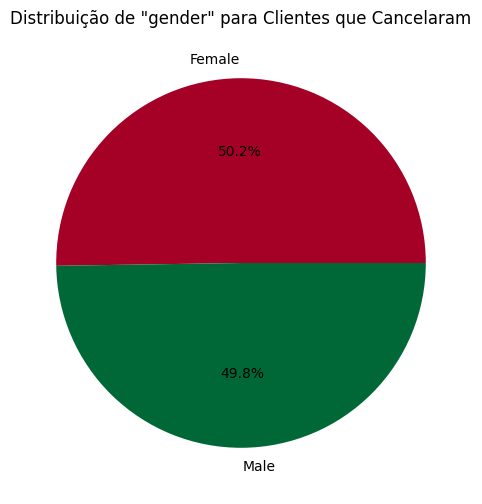

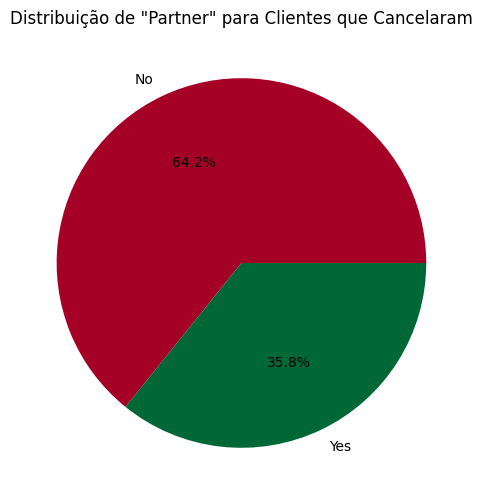

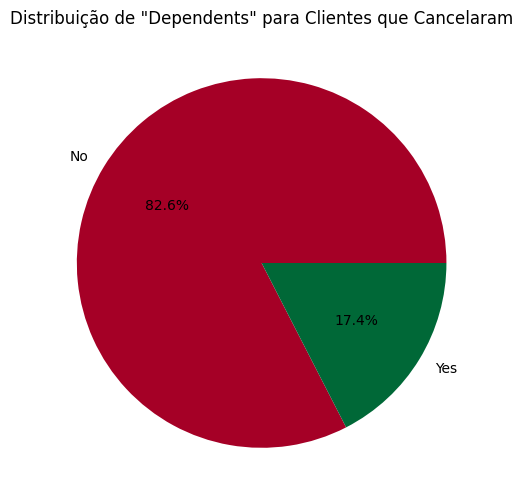

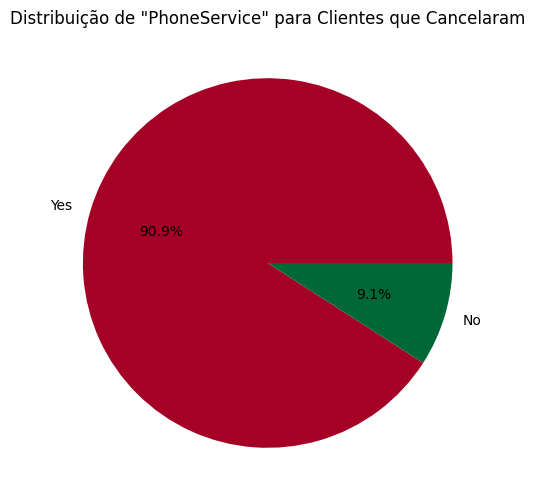

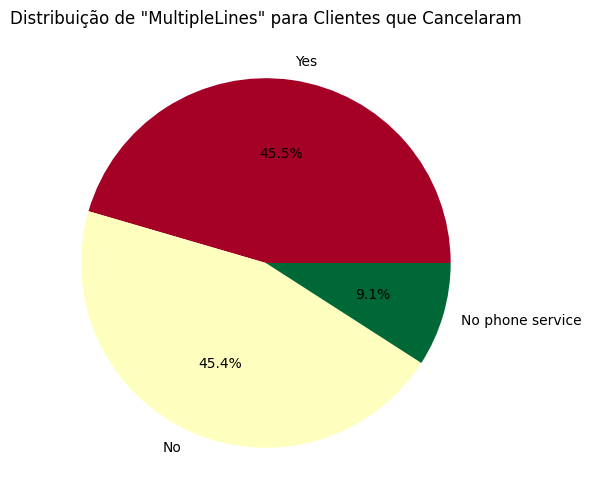

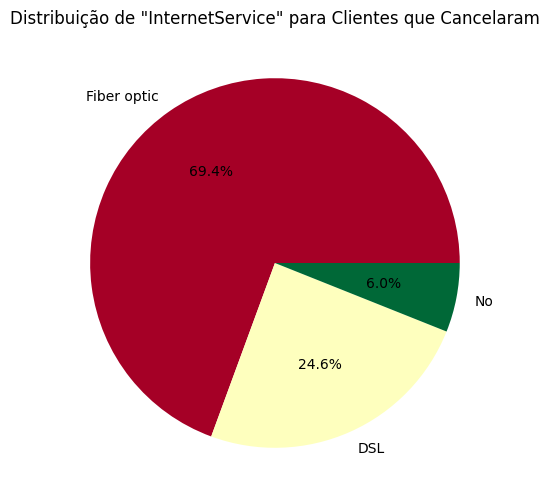

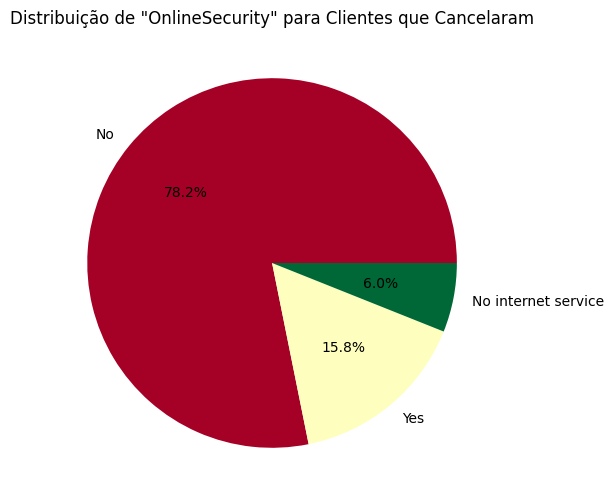

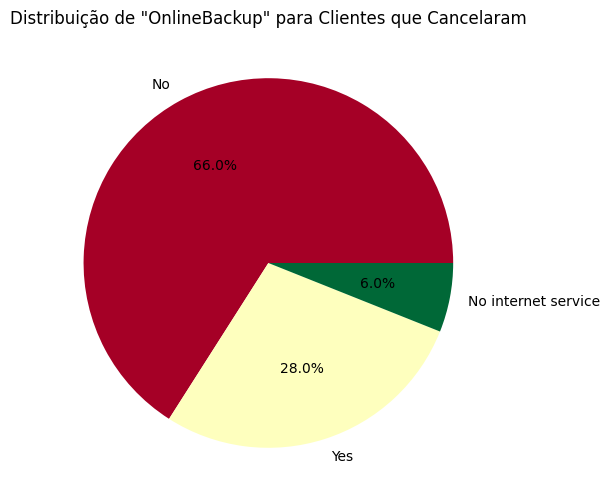

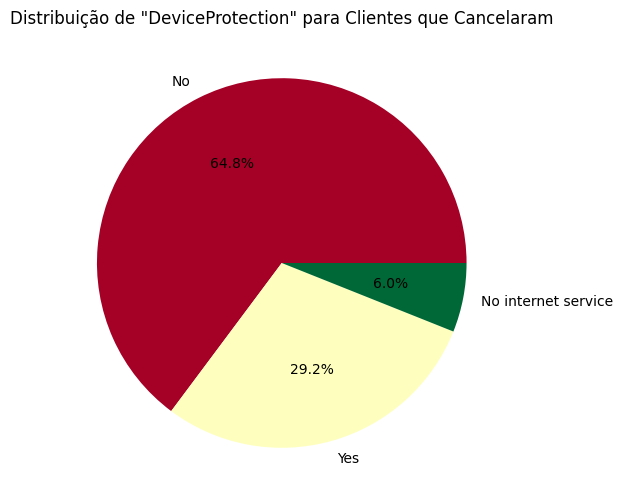

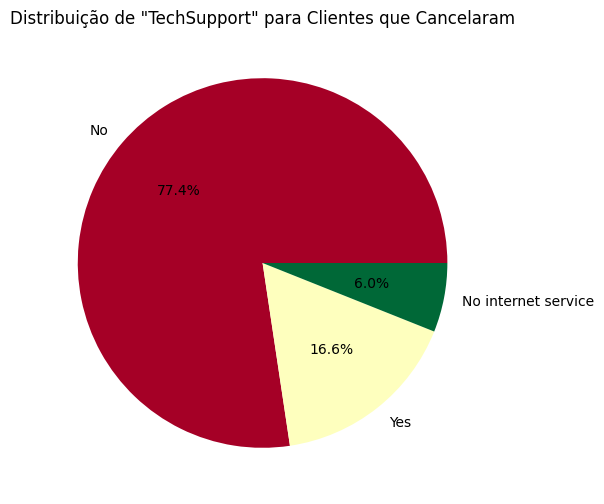

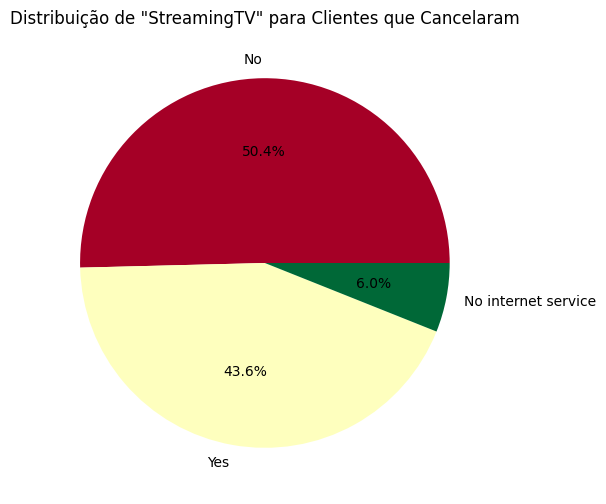

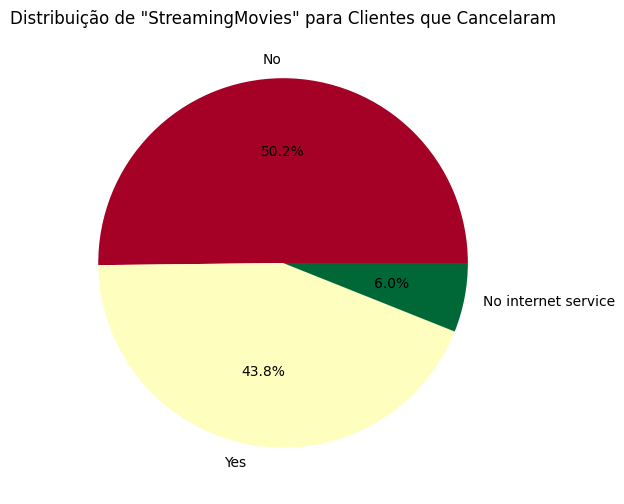

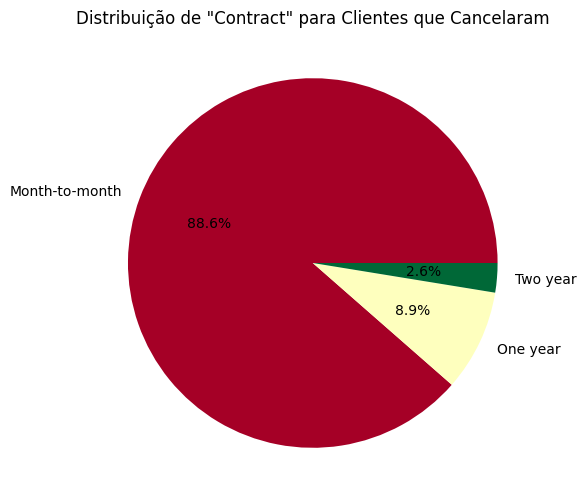

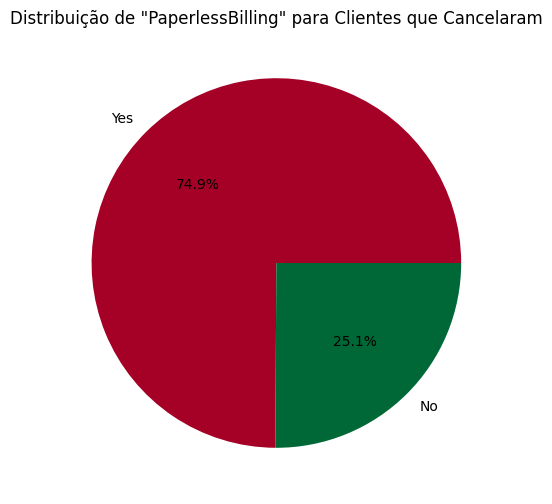

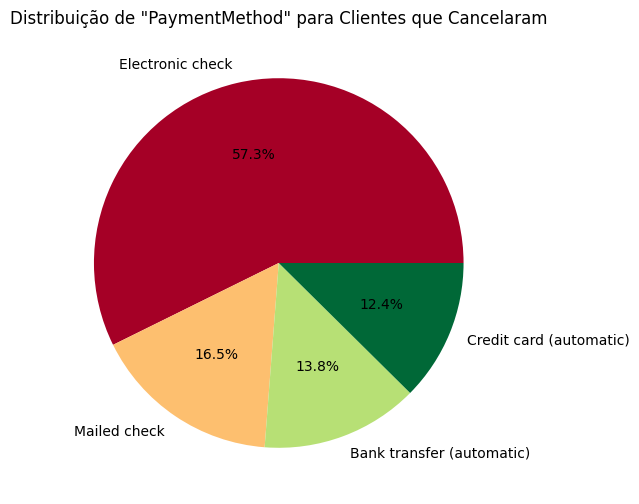

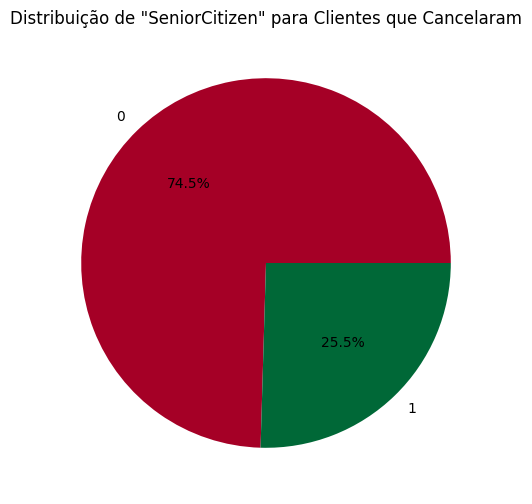

In [17]:
# 1. Colunas para analisar
colunas_para_analisar = [
    'gender',
    'Partner',
    'Dependents',
    'PhoneService',
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'Contract',
    'PaperlessBilling',
    'PaymentMethod',
    'SeniorCitizen'
]

import matplotlib.pyplot as plt

# 2. Loop para criar o gráfico para cada coluna

for coluna_atual in colunas_para_analisar:
    # Faz a contagem dentro de cada coluna, dentro dos clientes que cancelaram
    contagem_valores = clientes_cancelamento[coluna_atual].value_counts()

    plt.figure(figsize=(8, 6))

    contagem_valores.plot(kind='pie',
                          autopct='%1.1f%%',
                          title=f'Distribuição de "{coluna_atual}" para Clientes que Cancelaram',
                          ylabel='',
                          cmap='RdYlGn')

    plt.show()

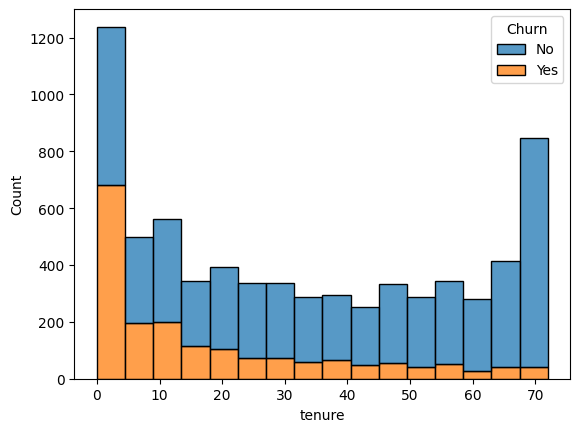

In [18]:
import seaborn as sns

sns.histplot(data=df_final, x='tenure', hue='Churn', multiple='stack')
plt.savefig('histograma_cancelamento_tempo.png', dpi=80, bbox_inches='tight')

In [19]:
df_cancelados = df_final[df_final['Churn'] == 'Yes']
total_cancelados = len(df_cancelados)


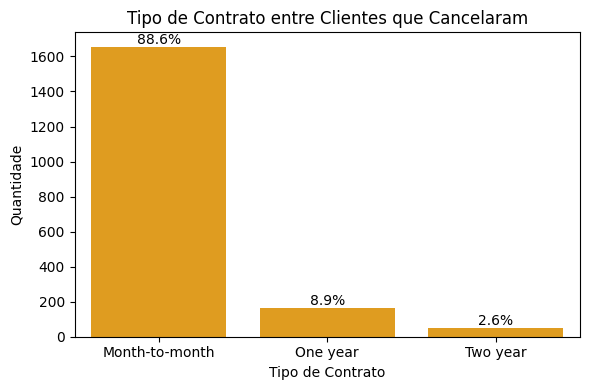

In [20]:
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df_cancelados, x='Contract', color='orange')

for p in ax.patches:
    count = p.get_height()
    percentage = 100 * count / total_cancelados
    ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2, count),
                ha='center', va='bottom', fontsize=10)

plt.title('Tipo de Contrato entre Clientes que Cancelaram')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Quantidade')
plt.tight_layout()
plt.savefig('cancelamento_tipo_contratos.png', dpi=80, bbox_inches='tight')
plt.show()



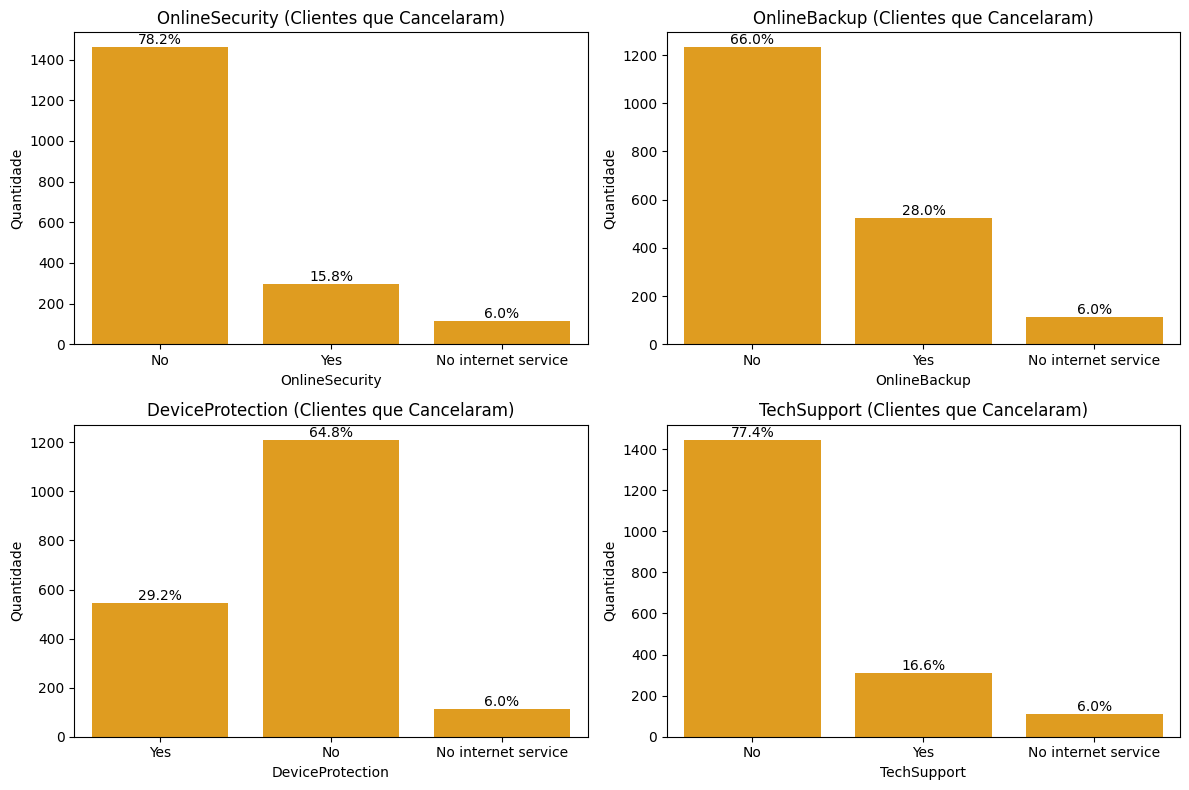

In [21]:
servicos = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, servico in enumerate(servicos):
    ax = sns.countplot(data=df_cancelados, x=servico, color='orange', ax=axes[i])

    for p in ax.patches:
        count = p.get_height()
        percentage = 100 * count / total_cancelados
        ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2, count),
                    ha='center', va='bottom', fontsize=10)

    ax.set_title(f'{servico} (Clientes que Cancelaram)')
    ax.set_xlabel(servico)
    ax.set_ylabel('Quantidade')

plt.tight_layout()
plt.savefig('cancelamento_servicos.png', dpi=80, bbox_inches='tight')
plt.show()


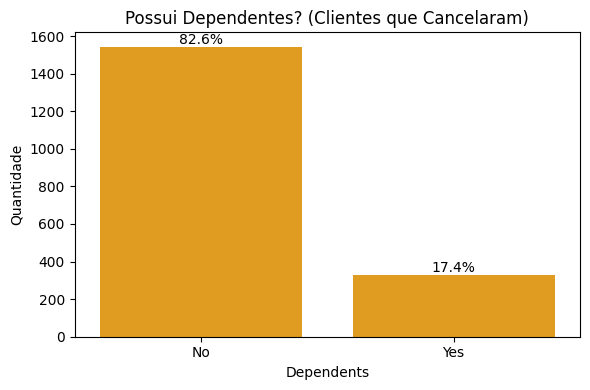

In [22]:
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df_cancelados, x='Dependents', color='orange')

for p in ax.patches:
    count = p.get_height()
    percentage = 100 * count / total_cancelados
    ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2, count),
                ha='center', va='bottom', fontsize=10)

plt.title('Possui Dependentes? (Clientes que Cancelaram)')
plt.xlabel('Dependents')
plt.ylabel('Quantidade')
plt.tight_layout()
plt.savefig('cancelamento_dependentes.png', dpi=80, bbox_inches='tight')
plt.show()


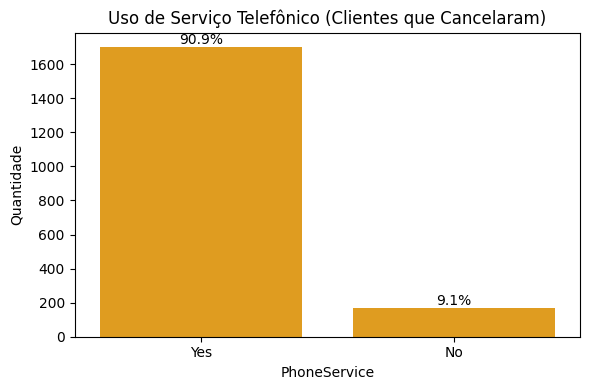

In [23]:
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df_cancelados, x='PhoneService', color='orange')

for p in ax.patches:
    count = p.get_height()
    percentage = 100 * count / total_cancelados
    ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2, count),
                ha='center', va='bottom', fontsize=10)

plt.title('Uso de Serviço Telefônico (Clientes que Cancelaram)')
plt.xlabel('PhoneService')
plt.ylabel('Quantidade')
plt.tight_layout()
plt.savefig('cancelamento_usotelefone.png', dpi=80, bbox_inches='tight')
plt.show()


In [24]:
# Criar faixas de cobrança mensal
bins = [0, 30, 60, 90, 120]  # Usar infinito para capturar todos os valores acima
labels = ['0-30', '31-60', '61-90', '91-120']

df_final['FaixaMensal'] = pd.cut(df_final['Charges.Monthly'],
                                bins=bins,
                                labels=labels,
                                right=False)

In [25]:
# Calcular % de cancelamentos por faixa
cancelamento_por_faixa = df_final.groupby('FaixaMensal')['Churn_numeric'].mean().reset_index()
cancelamento_por_faixa['Churn_percent'] = cancelamento_por_faixa['Churn_numeric'] * 100


<ipython-input-25-eeef6ad67fb2>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancelamento_por_faixa = df_final.groupby('FaixaMensal')['Churn_numeric'].mean().reset_index()


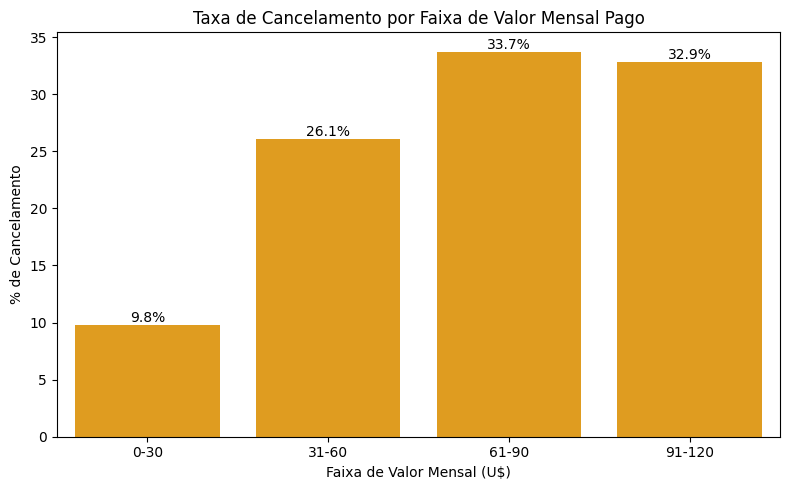

In [26]:
plt.figure(figsize=(8,5))
ax = sns.barplot(data=cancelamento_por_faixa, x='FaixaMensal', y='Churn_percent', color='orange')

# Adicionar as porcentagens em cima das barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width()/2, height),
                ha='center', va='bottom', fontsize=10)

plt.title('Taxa de Cancelamento por Faixa de Valor Mensal Pago')
plt.xlabel('Faixa de Valor Mensal (U$)')
plt.ylabel('% de Cancelamento')
plt.tight_layout()
plt.savefig('cancelamento_valor_mensal.png', dpi=80, bbox_inches='tight')
plt.show()


#📄Relatorio Final

# **Relatório de Análise de Cancelamentos – Empresa de TelecomX**

## **🔷 Objetivo**

Este relatório tem como objetivo analisar os dados de clientes que cancelaram seus serviços, buscando identificar padrões e possíveis causas para o cancelamento (churn), com base em dados reais e gráficos explicativos.

## **🔷 Base de Dados**

➡ Total de clientes analisados: 7.267

➡ Cancelamentos identificados: 1.870 (~25,7% do total)

➡ Dados tratados: valores nulos removidos da Coluna 'Churn' e valores nulos identificados como novos clientes nas Colunas 'Charges.Monthly'	e 'Charges.Total', conversão de variáveis categóricas para análise numérica (Churn: Yes = 1, No = 0), padronização de formatos.

## **🔷 Análises Realizadas e Principais Descobertas**
### 1️⃣ Tipo de Contrato
🔔 88,6% dos clientes que cancelaram estavam no modelo mensal.

*🧠 Hipótese: clientes com contrato mensal têm menor fidelidade, pois podem cancelar a qualquer momento sem penalidade. Planos anuais ou de longo prazo retêm mais.*

📊 Gráfico: Distribuição do tipo de contrato entre os cancelamentos.

 ![](https://drive.google.com/uc?export=view&id=1QOIlFCEnfS-C5kd770W0_KBe8PdtacpF)  

### 2️⃣ Serviços Adicionais
🔔Grande parte dos clientes que cancelaram não contratou serviços como:

➡ Online Security (66%)

➡ Backup Online (64%)

➡ Device Protection (65%)

➡ Suporte Técnico (78%)

*🧠 Hipótese: clientes que não usam serviços adicionais têm menor envolvimento com a empresa, menor valor percebido e maior propensão ao cancelamento.*

📊 Gráficos de barras individuais com porcentagens para cada serviço.

![](https://drive.google.com/uc?export=view&id=1hCH5DlXtShZl1vu568nUnf6ajt7puN4w)  
###3️⃣ Perfil do Cliente: Dependência e Telefone
🔔83% dos que cancelaram não possuíam dependentes.

🔔91% dos que cancelaram não utilizavam serviço telefônico.

*🧠 Hipótese: clientes sem dependentes e que contratam menos serviços demonstram menor engajamento com a empresa e menos barreiras para encerrar o contrato.*

###4️⃣ Valor Mensal Pago
🔔 Distribuição entre cancelamentos concentra-se em valores entre 60 dólares e 90 dólares.

Ao segmentar por faixas:

A taxa de cancelamento tende a aumentar entre clientes que pagam mais.

*🧠 Hipótese: clientes com mensalidades mais altas podem estar insatisfeitos com o custo-benefício, especialmente se não percebem vantagens claras ou serviços adicionais inclusos.*

📊 Gráfico de barra com faixas de valor mensal vs. % de cancelamentos.

![](https://drive.google.com/uc?export=view&id=1WN1OOuNwoTlAuXEXbRwteFXW029JngKX)
##**🔷 Conclusões**
### O cancelamento está fortemente associado a:

❗**Contratos mensais** 📌

❗Pouco uso de serviços adicionais

❗Menor envolvimento com a empresa (sem dependentes, sem telefone)

❗Mensalidades mais elevadas sem percepção de valor agregado

*📌Este ponto acredito que mereça uma atenção imediata maior, pois quase 90% dos cancelamentos estão vinculados a cobrança mês a mês.*
### Estratégias recomendadas:

✅Incentivar migração para contratos de maior fidelidade, quem sabe oferecendo maiores descontos e/ou beneficios para planos a longo prazo. (trimestral/anual).

✅Aumentar o engajamento oferecendo serviços adicionais como bônus por tempo de uso.

✅Campanhas direcionadas para clientes com alto valor mensal, ressaltando benefícios exclusivos.